In this package, for a bipartite network, the node type is called "layer". For example, there are two layers for bipartite network, one layer for uni-paritite network.

The network is saved in a csv file as edgelist. In this package, we use the "toy_data.csv" as example.

The layer index of nodes is saved in a csv file. The first column is the nodes; the second column is the node layer index. The layer index should be strings like *'1', '2', '3'* or *'a','b','c'*. **Nodes with different layer index will not be allocated into the same community**. 

In this package, we use the "toy_data_type_2_layer.csv" as the layer index file for bipartite network (network with 2 layers); we use the "toy_data_type_1_layer.csv" as the layer index file for uni-partite network (network with 1 layer); we use the "toy_data_type_3_layer.csv" as the layer index file for tri-partite network (network with 3 layers).

If the layer index file is not provided, the network will be loaded as a bipartite network, with nodes in the first column assigned in first layer and nodes in the second column assigned in second layer.

# pipeline - community detection for bipartite network

this section will present an example for detecting communities for bipartite networks. 

## read graph

In [1]:
import graph_tool.all as gt
import numpy as np
import random
import pandas as pd
import sbm_bipartite

dest="./toy_data.csv"
seed=43
gt.seed_rng(seed) ## seed for graph-tool's random number generator --> same results


/tmp/ipykernel_5715/28117161.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
model=sbm_bipartite.bipartite_sbm()
model.load_graph(dest)

## find community

In [4]:
model.fit()
print(model.state)
print(model.state.print_summary())

<NestedBlockState object, with base <BlockState object with 220 blocks (46 nonempty), degree-corrected, for graph <Graph object, undirected, with 220 vertices and 110 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fd00ffe2f40>, at 0x7fd00fe5e940>, and 6 levels of sizes [(220, 46), (46, 12), (12, 6), (6, 4), (4, 2), (2, 1)] at 0x7fd00fe5e7c0>


<NestedBlockState object, with base <BlockState object with 220 blocks (46 nonempty), degree-corrected, for graph <Graph object, undirected, with 220 vertices and 110 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fd00ffe2f40>, at 0x7fd01001b3a0>, and 6 levels of sizes [(220, 46), (46, 12), (12, 6), (6, 4), (4, 2), (2, 1)] at 0x7fd00ff600d0>

## draw the bipartite network

In [5]:
size = model.g.new_vp("float")     # creates a VertexPropertyMap of type string
for v in model.g.vertices():
    size[v] = 0.8
    

model.g.vp.size = size

In [6]:
eweight = model.g.new_ep("double")

for e in model.g.edges():
    eweight[e]=0.5

In [7]:
nedges=1000
hide_hierarchy=0
h_v_size=7.0
h_e_size=2.0
file="/home/simone/Downloads/prova6.pdf"

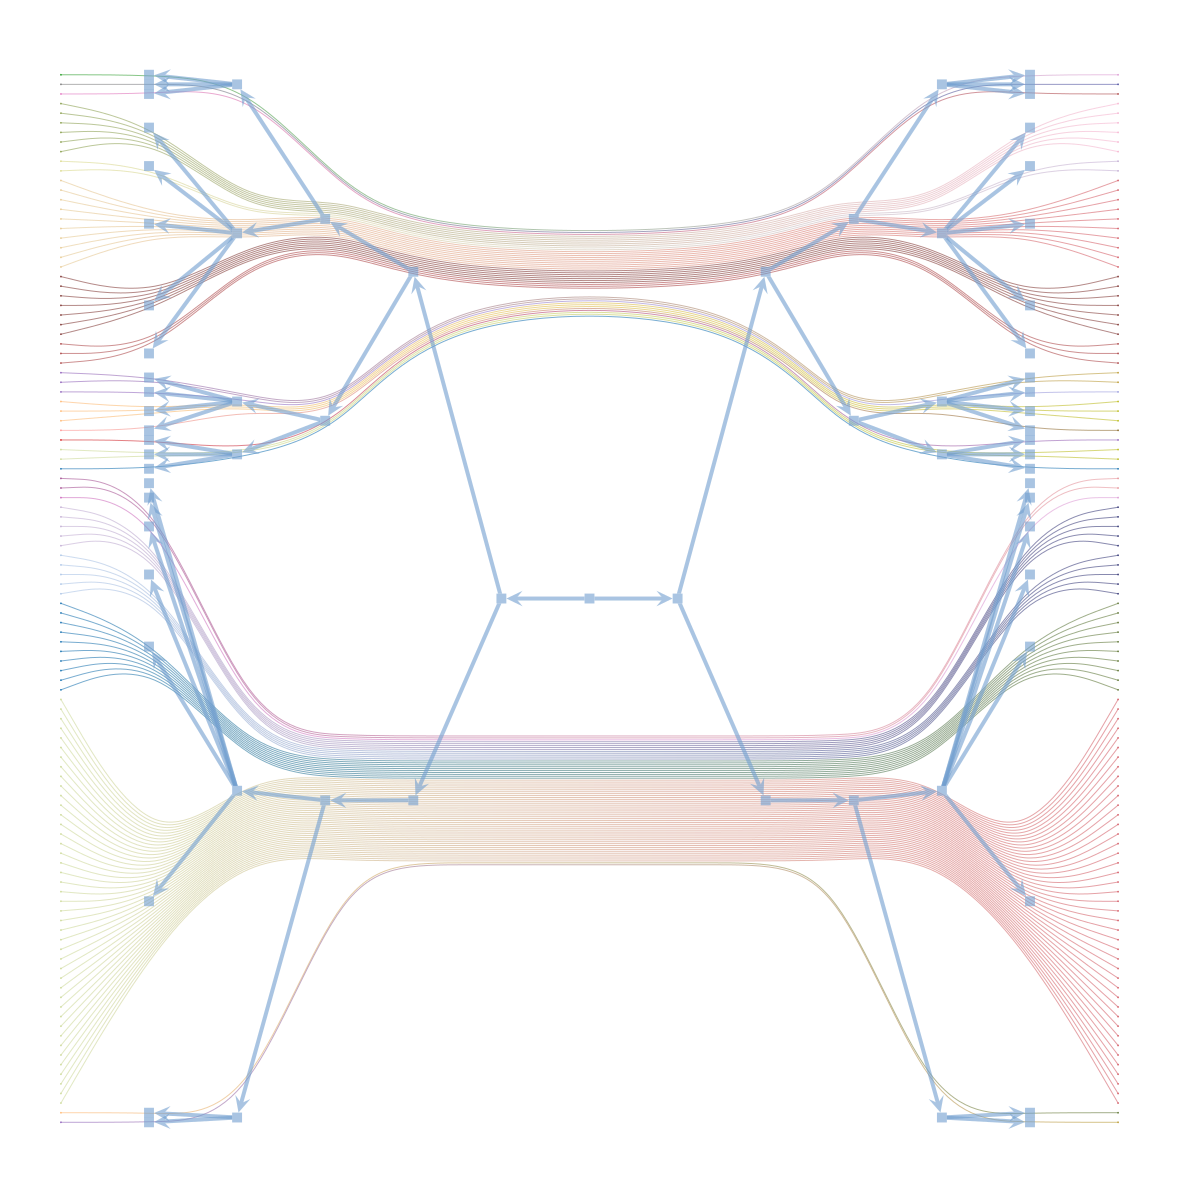

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd00ffe2f40, at 0x7fd00fea3670>,
 <GraphView object, directed, with 291 vertices and 290 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fd00fea3310, at 0x7fd00fe24b80>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fd00fea3310, at 0x7fd00fe246d0>, False), at 0x7fd00fea3310>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd00fea3310, at 0x7fd010139d60>)

In [8]:
'''
        Plot the graph and group structure.
        optional:
        - filename, str; where to save the plot. if None, will not be saved
        - nedges, int; subsample  to plot (faster, less memory)
        - hide_h, int; wether or not to hide the hierarchy
        - h_v_size, float; size of hierarchical vertices
        - h_e_size, float; size of hierarchical edges
        - **kwargs; keyword arguments passed to self.state.draw method (https://graph-tool.skewed.de/static/doc/draw.html#graph_tool.draw.draw_hierarchy)
        '''
model.state.draw(layout='bipartite', #vertex_text=g.vp.name,# output=filename,
                        vertex_size=size,
                        edge_pen_width=eweight,
                        subsample_edges=nedges, hshortcuts=1, hide=hide_hierarchy,
                        hvprops={'size':h_v_size},
                        heprops={'pen_width':h_e_size},
                        #output=file
                       )

## save the model

In [9]:
model.save_model('example')

# get the probability of nodes belonging to one community

In [ ]:
dest='toy_data.csv'
seed=43
gt.seed_rng(seed) ## seed for graph-tool's random number generator --> same results
np.random.seed(43)

model1=sbm_bipartite.bipartite_sbm()
model1.load_graph(dest)
model1.fit()
model1.state

model1.state.print_summary()

In [ ]:
# there will be a mcmc process; the results of communities of nodes could be changed compare to the results before.
# for each node, its community is the one with the highest probability
# force_niter: the sample generated from the model community results by mcmc process
# niter: the number of nodes moved in each step

model1.get_max_nested_from_mcmc(force_niter = 1000, niter = 10)

In [ ]:
# the probability of nodes belonging to its community. Only the highest one is kept.
model1.prob